# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


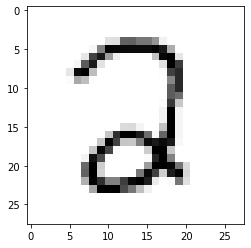

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24076002564536203
train accuracy is: 0.6558170589217159, test accuracy is 0.6890120967741935


Epoch 10 Loss 0.13961581344490356
train accuracy is: 0.8975963945918878, test accuracy is 0.9107862903225806


Epoch 20 Loss 0.07244583259619752
train accuracy is: 0.9264730428976798, test accuracy is 0.9400201612903226


Epoch 30 Loss 0.05204537409579019
train accuracy is: 0.943331664162911, test accuracy is 0.9526209677419355


Epoch 40 Loss 0.04307091527174591
train accuracy is: 0.9515940577532966, test accuracy is 0.9621975806451613


Epoch 50 Loss 0.03814980977432138
train accuracy is: 0.958103822400267, test accuracy is 0.9637096774193549


Epoch 60 Loss 0.035020826144308057
train accuracy is: 0.9606910365548322, test accuracy is 0.9647177419354839


Epoch 70 Loss 0.032788011286519494
train accuracy is: 0.9627774995827074, test accuracy is 0.9642137096774194


Epoch 80 Loss 0.031113914047037835
train accuracy is: 0.9649474211316975, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.029767781047034054
train accuracy is: 0.9662827574695376, test accuracy is 0.9667338709677419


Epoch 100 Loss 0.02865193404366689
train accuracy is: 0.9672008012018027, test accuracy is 0.9667338709677419


Epoch 110 Loss 0.027693786742346984
train accuracy is: 0.9677015523284928, test accuracy is 0.967741935483871


Epoch 120 Loss 0.026863696700170678
train accuracy is: 0.9692872642296778, test accuracy is 0.9682459677419355


Epoch 130 Loss 0.026124844215683833
train accuracy is: 0.9697045568352529, test accuracy is 0.9682459677419355


Epoch 140 Loss 0.025455628283446958
train accuracy is: 0.970372225004173, test accuracy is 0.9672379032258065


Epoch 150 Loss 0.024847838381302476
train accuracy is: 0.971039893173093, test accuracy is 0.967741935483871


Epoch 160 Loss 0.024293310105881937
train accuracy is: 0.9716241028208981, test accuracy is 0.96875


Epoch 170 Loss 0.02377374806307591
train accuracy is: 0.9727090635953931, test accuracy is 0.9692540322580645


Epoch 180 Loss 0.023288997204108514
train accuracy is: 0.9735436488065431, test accuracy is 0.9702620967741935


Epoch 190 Loss 0.0228324485566818
train accuracy is: 0.9738774828910032, test accuracy is 0.9707661290322581


Epoch 200 Loss 0.022402524010246623
train accuracy is: 0.9741278584543482, test accuracy is 0.9707661290322581


Epoch 210 Loss 0.021992271712732634
train accuracy is: 0.9747120681021533, test accuracy is 0.9702620967741935


Epoch 220 Loss 0.02160516016409314
train accuracy is: 0.9750459021866132, test accuracy is 0.9702620967741935


Epoch 230 Loss 0.021229344715104112
train accuracy is: 0.9758804873977633, test accuracy is 0.9707661290322581


Epoch 240 Loss 0.020872540792815933
train accuracy is: 0.9760474044399933, test accuracy is 0.9707661290322581


0.025268206285136447

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23592326481419512
train accuracy is: 0.6946252712401936, test accuracy is 0.6814516129032258


Epoch 10 Loss 0.1019985430128803
train accuracy is: 0.9117843431814389, test accuracy is 0.920866935483871


Epoch 20 Loss 0.078103979364183
train accuracy is: 0.9300617593056251, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06709227675783491
train accuracy is: 0.9401602403605408, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06051862278932035
train accuracy is: 0.9444166249374061, test accuracy is 0.9526209677419355


Epoch 50 Loss 0.0560737551608313
train accuracy is: 0.9467534635286263, test accuracy is 0.9561491935483871


Epoch 60 Loss 0.05282899857560681
train accuracy is: 0.9494241362043064, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.05033671677266102
train accuracy is: 0.9510933066266066, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.04834641781823394
train accuracy is: 0.9520113503588716, test accuracy is 0.9586693548387096


Epoch 90 Loss 0.04671409749091323
train accuracy is: 0.9531797696544817, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.045342177917858224
train accuracy is: 0.9543481889500918, test accuracy is 0.9601814516129032


Epoch 110 Loss 0.04416868249267103
train accuracy is: 0.9553496912034719, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.04314964037232204
train accuracy is: 0.9561842764146219, test accuracy is 0.9652217741935484


Epoch 130 Loss 0.0422536769531404
train accuracy is: 0.957102320146887, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.04145744485794255
train accuracy is: 0.958020363879152, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.040744086033123204
train accuracy is: 0.9586880320480721, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.040099434397665425
train accuracy is: 0.9588549490903021, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.03951332634422128
train accuracy is: 0.9596895343014522, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.0389768564706669
train accuracy is: 0.9599399098647972, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03848360569259529
train accuracy is: 0.9602737439492572, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.03802747189645348
train accuracy is: 0.9605241195126022, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.03760425541282422
train accuracy is: 0.9607744950759473, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.037210291083506826
train accuracy is: 0.9611083291604072, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03684136114194287
train accuracy is: 0.9614421632448673, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.036496166265770597
train accuracy is: 0.9616090802870974, test accuracy is 0.9662298387096774


0.06340294886702191

### Comparing results of NN and LR

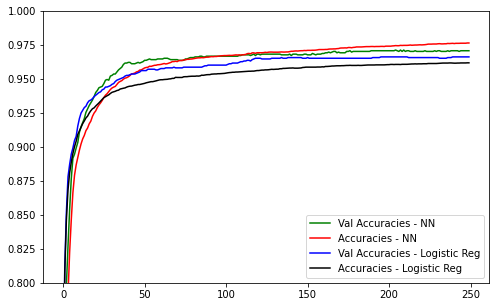

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

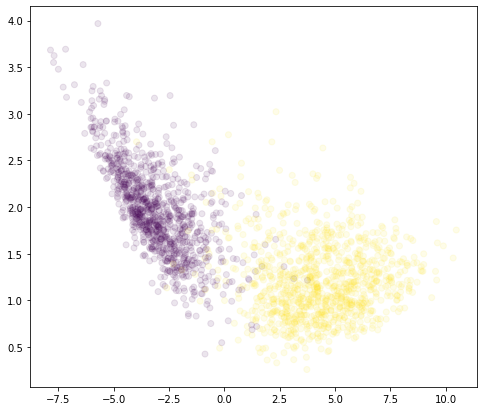

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

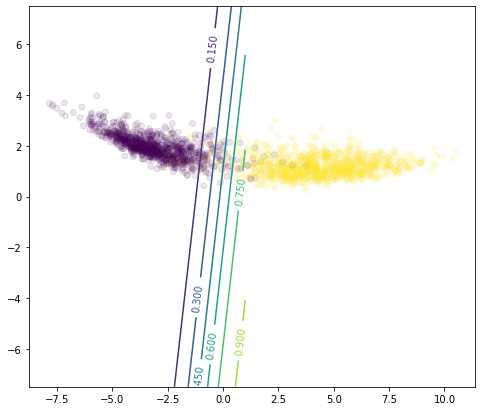

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );